<a href="https://colab.research.google.com/github/abdulabba0/data_analysis/blob/main/Airline_Flights_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step by Step Procedure**
- Download the Dataset
- Load the Dataset
- Preview the overview of the Dataset
- Data Cleaning
- Data visualization
- Descriptive and Statistics Analysis
- Interpretation and Reporting

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Download the Dataset**

In [2]:
#!/bin/bash
!curl -L -o airlines-flights-data.zip\
  https://www.kaggle.com/api/v1/datasets/download/rohitgrewal/airlines-flights-data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2383k  100 2383k    0     0  1006k      0  0:00:02  0:00:02 --:--:-- 1227k


In [3]:
!unzip airlines-flights-data.zip

Archive:  airlines-flights-data.zip
  inflating: airlines_flights_data.csv  


## **Load the Dataset**

In [4]:
df = pd.read_csv('airlines_flights_data.csv')
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## **Preview the overview of the Dataset**

In [5]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
# Summary
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
# Columns in the dataset
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [8]:
# Displaying all rows
pd.set_option('display.max_rows', None)
df.head(25)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [9]:
# Random sample of the data
df.sample(10).flight

,flight
35738,6E-6187
151246,UK-708
67354,I5-336
275298,UK-874
131630,UK-706
81641,AI-687
270293,UK-778
105764,UK-893
264103,UK-720
195340,UK-828


In [10]:
# Making the index column as the index
df.set_index('index', inplace=True)

In [11]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## **Data Cleaning**

In [12]:
# Checking for null data
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [13]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

### **Overview Summary**
- There is no missing data
- Zero duplicated data

## **Data Visualization**

In [14]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [15]:
df.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
206148,Air_India,AI-430,Chennai,Morning,one,Night,Hyderabad,Economy,13.67,43,3979
272486,Air_India,AI-402,Kolkata,Morning,one,Night,Hyderabad,Business,13.17,47,52063
44910,Vistara,UK-875,Mumbai,Evening,one,Afternoon,Delhi,Economy,17.33,12,9933
94182,Air_India,AI-503,Bangalore,Evening,one,Evening,Mumbai,Economy,26.17,2,10779
214104,Air_India,AI-473,Delhi,Evening,one,Evening,Bangalore,Business,22.42,28,39783
61905,Vistara,UK-958,Mumbai,Afternoon,one,Evening,Kolkata,Economy,5.67,4,9879
15873,Vistara,UK-993,Delhi,Afternoon,one,Evening,Bangalore,Economy,6.42,30,4496
269789,Vistara,UK-776,Kolkata,Evening,one,Morning,Bangalore,Business,15.25,42,52287
169545,Vistara,UK-870,Hyderabad,Night,one,Night,Bangalore,Economy,23.83,39,6776


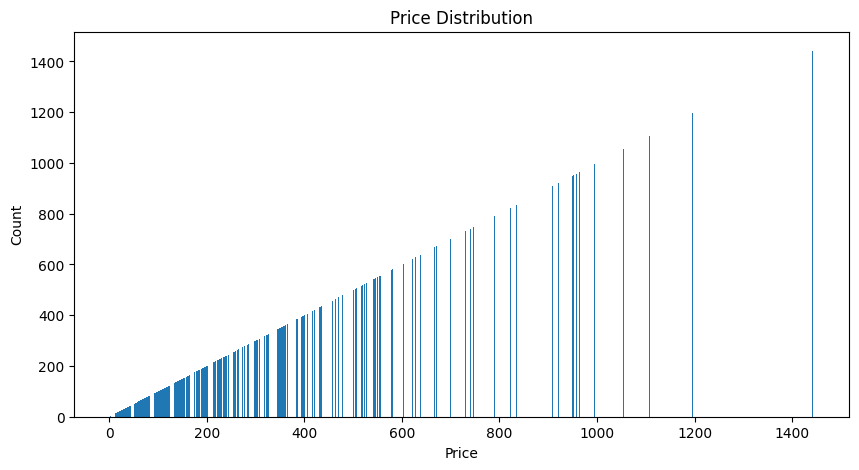

In [16]:
# Plotting Price Diatribution
plt.figure(figsize=(10, 5))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.bar(df.price.value_counts().values, df.price.value_counts())
plt.show()

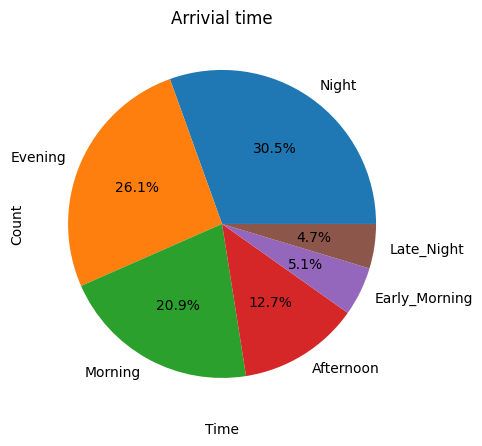

In [18]:
# Plotting Arrivial time
plt.figure(figsize=(10, 5))
plt.title('Arrivial Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.pie(df.arrival_time.value_counts(), labels=df.arrival_time.value_counts().index, autopct='%1.1f%%')
plt.show()

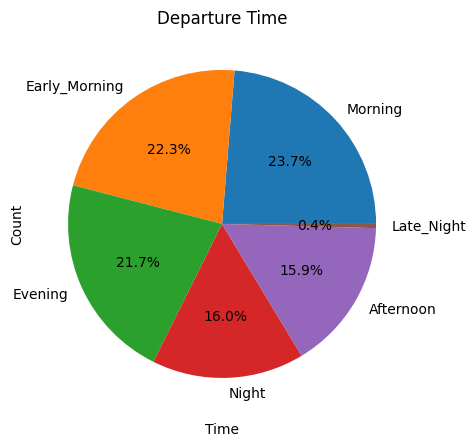

In [19]:
# Plotting Departure time
plt.figure(figsize=(10, 5))
plt.title('Departure Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.pie(df.departure_time.value_counts(), labels=df.departure_time.value_counts().index, autopct='%1.1f%%')
plt.show()

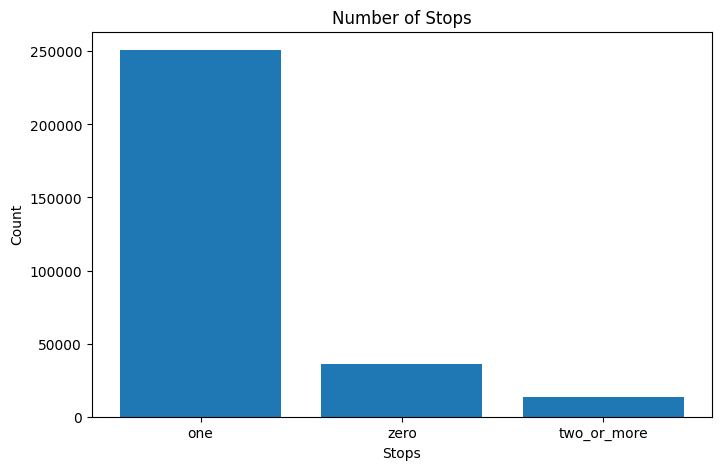

In [23]:
# Plotting for number of stops
plt.figure(figsize=(8,5))
plt.title('Number of Stops')
plt.xlabel('Stops')
plt.ylabel('Count')
plt.bar(df.stops.value_counts().index, df.stops.value_counts())
plt.show()
